<font size="+3"><strong>5.2. Imbalanced Data</strong></font>

In the last lesson, we prepared the data. 

In this lesson, we're going to explore some of the features of the dataset, use visualizations to help us understand those features, and develop a model that solves the problem of imbalanced data by under- and over-sampling.

In [1]:
import gzip
import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wqet_grader
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

wqet_grader.init("Project 5 Assessment")


In [2]:
from IPython.display import VimeoVideo

In [4]:
VimeoVideo("694058667", h="44426f200b", width=600)

# Prepare Data

## Import

As always, we need to begin by bringing our data into the project, and the function we developed in the previous module is exactly what we need. 

In [3]:
VimeoVideo("694058628", h="00b4cfd027", width=600)

**Task 5.2.1:** Complete the `wrangle` function below using the code you developed in the last lesson. Then use it to import `poland-bankruptcy-data-2009.json.gz` into the DataFrame `df`.

- [<span id='technique'>Write a function in <span id='tool'>Python</span></span>.](../%40textbook/02-python-advanced.ipynb#Functions)

In [4]:
def wrangle(filename):
    
    # Open compressed file, load into dictionary
    with gzip.open(filename,"r") as f:
        data = json.load(f)
    
    # Load dictionary into DataFrame, set index
    df = pd.DataFrame().from_dict(data["data"]).set_index("company_id")
    return df

In [6]:
df = wrangle("data/poland-bankruptcy-data-2009.json.gz")
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


## Explore

Let's take a moment to refresh our memory on what's in this dataset. In the last lesson, we noticed that the data was stored in a JSON file (similar to a Python dictionary), and we explored the key-value pairs. This time, we're going to look at what the values in those pairs actually are.

In [7]:
VimeoVideo("694058591", h="8fc20629aa", width=600)

**Task 5.2.2:** Use the `info` method to explore `df`. What type of features does this dataset have? Which column is the target? Are there columns will missing values that we'll need to address?

- [Inspect a DataFrame using the `shape`, `info`, and `head` in pandas.](../%40textbook/03-pandas-getting-started.ipynb#Inspecting-DataFrames)

In [8]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   flo

That's solid information. We know all our features are numerical and that we have missing data. But, as always, it's a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work. First, let's take a look at how many firms are bankrupt, and how many are not.

In [9]:
VimeoVideo("694058537", h="01caf9ae83", width=600)

**Task 5.2.3:** Create a bar chart of the value counts for the `"bankrupt"` column. You want to calculate the relative frequencies of the classes, not the raw count, so be sure to set the `normalize` argument to `True`.

- [What's a <span id='term'>bar chart</span>?](../%40textbook/06-visualization-matplotlib.ipynb#Bar-Charts)
- [What's a <span id='technique'>majority class</span>?](../%40textbook/14-ml-classification.ipynb#Majority-and-Minority-Classes)
- [What's a <span id='technique'>minority class</span>?](../%40textbook/14-ml-classification.ipynb#Majority-and-Minority-Classes)
- [What's a positive class?](../%40textbook/14-ml-classification.ipynb#Positive-and-Negative-Classes)
- [What's a negative class?](../%40textbook/14-ml-classification.ipynb#Positive-and-Negative-Classes)
- [Aggregate data in a Series using `value_counts` in pandas.](../%40textbook/04-pandas-advanced.ipynb#Working-with-value_counts-in-a-Series)
- [<span id='technique'>Create a bar chart using <span id='tool'>pandas</span></span>.](../%40textbook/07-visualization-pandas.ipynb#Bar-Charts)

<AxesSubplot:title={'center':'Class Balance'}, xlabel='Bankrupt', ylabel='Frequency'>

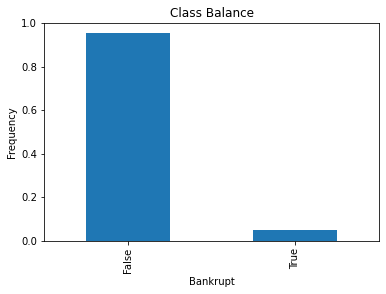

In [15]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Bankrupt",
    ylabel="Frequency",
    title="Class Balance"
)

That's good news for Poland's economy! Since it looks like most of the companies in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class.

In the last lesson, we saw that there were 64 features of each company, each of which had some kind of numerical value. It might be useful to understand where the values for one of these features cluster, so let's make a boxplot to see how the values in `"feat_27"` are distributed.

In [16]:
VimeoVideo("694058487", h="6e066151d9", width=600)

**Task 5.2.4:** Use seaborn to create a boxplot that shows the distributions of the `"feat_27"` column for both groups in the `"bankrupt"` column. Remember to label your axes. 

- [What's a <span id='term'>boxplot</span>?](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)
- [<span id='technique'>Create a boxplot using <span id='tool'>Matplotlib</span></span>.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

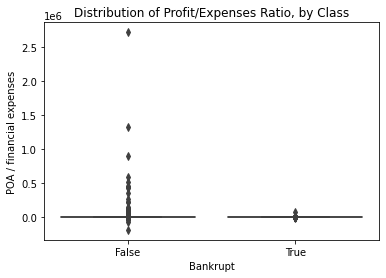

In [17]:
# Create boxplot
sns.boxplot(x="bankrupt",y="feat_27",data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Why does this look so funny? Remember that boxplots exist to help us see the quartiles in a dataset, and this one doesn't really do that. Let's check the distribution of `"feat_27"`to see if we can figure out what's going on here.

In [18]:
VimeoVideo("694058435", h="8f0ae805d6", width=600)

**Task 5.2.5:** Use the `describe` method on the column for `"feat_27"`. What can you tell about the distribution of the data based on the mean and median?

In [21]:
# Summary statistics for `feat_27`
df["feat_27"].describe().apply("{0:,.0f}".format)

count        9,312
mean         1,206
std         35,477
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object

Hmmm. Note that the median is around 1, but the mean is over 1000. That suggests that this feature is skewed to the right. Let's make a histogram to see what the distribution actually looks like.

In [22]:
VimeoVideo("694058398", h="1078bb6d8b", width=600)

**Task 5.2.6:** Create a histogram of `"feat_27"`. Make sure to label x-axis `"POA / financial expenses"`, the y-axis `"Count"`, and use the title `"Distribution of Profit/Expenses Ratio"`.

- [What's a histogram?](../%40textbook/06-visualization-matplotlib.ipynb#Histograms)
- [Create a histogram using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Histograms) 

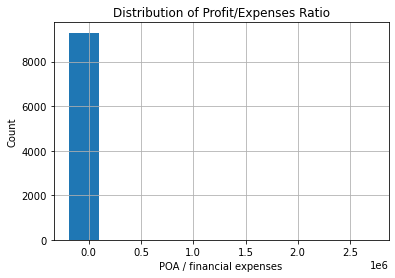

In [23]:
# Plot histogram of `feat_27`
df["feat_27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

Aha! We saw it in the numbers and now we see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data. 

In [24]:
VimeoVideo("694058328", h="4aecdc442d", width=600)

In [28]:
q1,q9 = df["feat_27"].quantile([0.1,0.9])
mask=df["feat_27"].between(q1,q9)
mask.head()

company_id
1     True
2    False
3     True
5    False
6     True
Name: feat_27, dtype: bool

**Task 5.2.7:** Recreate the boxplot that you made above, this time only using the values for `"feat_27"` that fall between the `0.1` and `0.9` quantiles for the column.

- [What's a boxplot?](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)
- [What's a quantile?](../%40textbook/05-pandas-summary-statistics.ipynb#Calculate-the-Quantiles-for-a-Series)
- [Calculate the quantiles for a Series in pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Calculate-the-Quantiles-for-a-Series)
- [Create a boxplot using Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

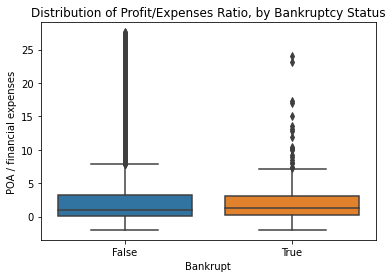

In [29]:
# Create clipped boxplot
q1,q9 = df["feat_27"].quantile([0.1,0.9])
mask=df["feat_27"].between(q1,q9)
sns.boxplot(x="bankrupt",y="feat_27",data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

That makes a lot more sense. Let's take a look at some of the other features in the dataset to see what else is out there.

<div class="alert alert-info" role="alert">
    <p><b>More context on <code>"feat_27"</code>:</b> <em>Profit on operating activities</em> is profit that a company makes through its "normal" operations. For instance, a car company profits from the sale of its cars. However, a company may have other forms of profit, such as financial investments. So a company's <em>total profit</em> may be positive even when its profit on operating activities is negative.
    <p><em>Financial expenses</em> include things like interest due on loans, and does not include "normal" expenses (like the money that a car company spends on raw materials to manufacture cars). 
   </div>

**Task 5.2.8:** Repeat the exploration you just did for `"feat_27"` on two other features in the dataset. Do they show the same skewed distribution? Are there large differences between bankrupt and solvent companies?

In [ ]:
# Explore another feature

Looking at other features, we can see that they're skewed, too. This will be important to keep in mind when we decide what type of model we want to use.

Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check.

In [30]:
VimeoVideo("694058273", h="85b3be2f63", width=600)

**Task 5.2.9:** Plot a correlation heatmap of features in `df`. Since `"bankrupt"` will be your target, you don't need to include it in your heatmap.

- [What's a <span id='term'>heatmap?](../%40textbook/09-visualization-seaborn.ipynb#Correlation-Heatmaps)
- [<span id='technique'>Create a correlation matrix in <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Correlation-Matrices)
- [<span id='technique'>Create a heatmap in <span id='tool'>seaborn.](../%40textbook/09-visualization-seaborn.ipynb#Correlation-Heatmaps)

<AxesSubplot:>

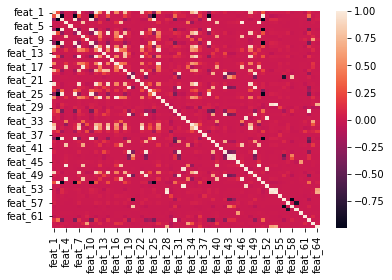

In [34]:
corr = df.drop(columns="bankrupt").corr()
corr.head()
sns.heatmap(corr)

So what did we learn from this EDA? First, our data is imbalanced. This is something we need to address in our data preparation. Second, many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

## Split

So let's start building that model. If you need a refresher on how and why we split data in these situations, take a look back at the Time Series module.

**Task 5.2.10:** Create your feature matrix `X` and target vector `y`. Your target is `"bankrupt"`. 

- [What's a <span id='term'>feature matrix</span>?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [What's a <span id='term'>target vector</span>?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [<span id='technique'>Subset a DataFrame by selecting one or more columns in <span id='tool'>pandas</span></span>.](../%40textbook/04-pandas-advanced.ipynb#Subset-a-DataFrame-by-Selecting-One-or-More-Columns) 
- [<span id='technique'>Select a Series from a DataFrame in <span id='tool'>pandas</span></span>.](../%40textbook/04-pandas-advanced.ipynb#Combine-multiple-categories-in-a-Series) 

In [35]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9977, 64)
y shape: (9977,)


In order to make sure that our model can generalize, we need to put aside a test set that we'll use to evaluate our model once it's trained. 

**Task 5.2.11:** Divide your data (`X` and `y`) into training and test sets using a randomized train-test split. Your validation set should be 20% of your total data. And don't forget to set a `random_state` for reproducibility. 

- [<span id='technique'>Perform a randomized train-test split using <span id='tool'>scikit-learn</span></span>.](../%40textbook/14-ml-classification.ipynb#Randomized-Train-Test-split)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size=0.2,random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7981, 64)
y_train shape: (7981,)
X_test shape: (1996, 64)
y_test shape: (1996,)


Note that if we wanted to tune any hyperparameters for our model, we'd do another split here, further dividing the training set into training and validation sets. However, we're going to leave hyperparameters for the next lesson, so no need to do the extra split now.

## Resample

Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data. (This will be different than the resampling we did with time series data in Project 3.) There are many to do this, so let's start with under-sampling.

In [37]:
VimeoVideo("694058220", h="00c3a98358", width=600)

In [41]:
y_train_under.value_counts(normalize=True)

False    0.5
True     0.5
Name: bankrupt, dtype: float64

**Task 5.2.12:** Create a new feature matrix `X_train_under` and target vector `y_train_under` by performing random under-sampling on your training data.

- [What is under-sampling?](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Under-sampling)
- [Perform random under-sampling using imbalanced-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Under-sampling)

In [40]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(768, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.121400,0.097238,0.74500,8.66160,25.8370,0.000000,0.158840,9.284100,2.7588,0.902760,...,775.71,0.075999,0.13447,0.94243,0.000000,4.9049,11.3390,12.865,28.3720,17.4870
1,0.316280,0.264920,0.65346,3.46660,55.1890,0.290140,0.316280,2.774700,2.4721,0.735080,...,1367.90,0.119990,0.43027,0.87412,0.000000,10.6020,4.5533,39.115,9.3314,30.2870
2,0.066615,0.890270,-0.48007,0.46076,-76.3080,0.047487,0.087936,-0.011406,1.0952,-0.010155,...,-46566.00,0.086894,-6.56010,0.91311,0.000000,32.0280,10.0480,105.220,3.4689,5.2362
3,0.208000,0.363630,0.33875,1.93160,-5.3169,0.251870,0.258280,1.603300,1.0535,0.583020,...,187050.00,0.050746,0.35676,0.94925,0.000000,34.8840,19.0030,24.498,14.8990,18.2040
4,0.096863,0.299320,0.35393,2.42640,31.5630,0.267550,0.125130,2.341000,1.0495,0.700680,...,2993.00,0.047123,0.13824,0.95288,0.073041,13.7820,6.8621,39.668,9.2013,5.7376


<div class="alert alert-info" role="alert">
    <b>Note:</b> Depending on the random state you set above, you may get a different  shape for <code>X_train_under</code>. Don't worry, it's normal!
</div>

And then we'll over-sample.

In [42]:
VimeoVideo("694058177", h="5cef977f2d", width=600)

**Task 5.2.13:** Create a new feature matrix `X_train_over` and target vector `y_train_over` by performing random over-sampling on your training data.

- [What is over-sampling?](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Over-sampling)
- [Perform random over-sampling using imbalanced-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Over-sampling)

In [43]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(15194, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.279320,0.053105,0.852030,17.0440,199.080,0.741770,0.353570,16.00600,1.2346,0.84997,...,52857.00,0.190040,0.328630,0.80996,0.00000,NaN,4.1858,11.002,33.1760,18.5720
1,0.001871,0.735120,0.156460,1.2269,-10.837,0.000000,0.002938,0.36032,1.4809,0.26488,...,440.02,0.014794,0.007064,0.99803,0.00000,7.4268,2.2925,169.960,2.1476,9.6185
2,0.113940,0.490250,0.077121,1.2332,-43.184,-0.000171,0.113940,1.03980,1.1649,0.50975,...,4617.40,0.214890,0.223520,0.78761,0.27412,6.2791,6.1622,103.630,3.5220,1.9673
3,0.008136,0.652610,0.148120,1.2628,29.071,0.000000,0.008136,0.53230,1.2891,0.34739,...,920.98,0.045169,0.023421,0.99434,0.14403,22.7480,2.2673,159.580,2.2872,4.4718
4,0.045396,0.279640,0.708730,3.7656,238.120,0.000000,0.056710,2.57610,1.0169,0.72036,...,10744.00,0.047501,0.063019,0.94624,0.00000,13.8860,49.0660,91.984,3.9681,29.0460


In [44]:
y_train_over.value_counts(normalize=True)

False    0.5
True     0.5
Name: bankrupt, dtype: float64

# Build Modelnormalize=

## Baseline

As always, we need to establish the baseline for our model. Since this is a classification problem, we'll use accuracy score.

In [45]:
VimeoVideo("694058140", h="7ae111412f", width=600)

**Task 5.2.14:** Calculate the baseline accuracy score for your model.

- [What's <span id='tool'>accuracy score</span>?](../%40textbook/14-ml-classification.ipynb#Calculating-Accuracy-Score)
- [Aggregate data in a Series using `value_counts` in pandas.](../%40textbook/04-pandas-advanced.ipynb#Working-with-value_counts-in-a-Series)

In [46]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9519


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually *good.* 

## Iterate

Now that we have a baseline, let's build a model to see if we can beat it.

In [47]:
VimeoVideo("694058110", h="dc751751bf", width=600)

**Task 5.2.15:** Create three identical models: `model_reg`, `model_under` and `model_over`. All of them should use a `SimpleImputer` followed by a `DecisionTreeClassifier`. Train `model_reg` using the unaltered training data. For `model_under`, use the undersampled data. For `model_over`, use the oversampled data.

- [What's a <span id='term'>decision tree</span>?](../%40textbook/14-ml-classification.ipynb#Decision-Trees)
- [What's imputation?](../%40textbook/12-ml-core.ipynb#Imputation) 
- [<span id='technique'>Create a pipeline in <span id='tool'>scikit-learn</span></span>.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Creating-a-Pipeline-in-scikit-learn)
- [<span id='technique'>Fit a model to training data in <span id='tool'>scikit-learn</span></span>.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)

In [49]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate

How did we do?

In [50]:
VimeoVideo("694058076", h="d57fb27d07", width=600)

**Task 5.2.16:** Calculate training and test accuracy for your three models. 

- [What's an accuracy score?](../%40textbook/14-ml-classification.ipynb#Evaluation)
- [Calculate the accuracy score for a model in scikit-learn.](../%40textbook/14-ml-classification.ipynb#Evaluation)

In [51]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9359
Training Accuracy: 0.7421
Test Accuracy: 0.7104
Training Accuracy: 1.0
Test Accuracy: 0.9344


As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

In [52]:
VimeoVideo("694058022", h="ce29f57dee", width=600)

**Task 5.2.17:** Plot a confusion matrix that shows how your best model performs on your validation set. 

- [What's a confusion matrix?](../%40textbook/14-ml-classification.ipynb#Confusion-Matrix)
- [Create a confusion matrix using scikit-learn.](../%40textbook/14-ml-classification.ipynb#Confusion-Matrix) 

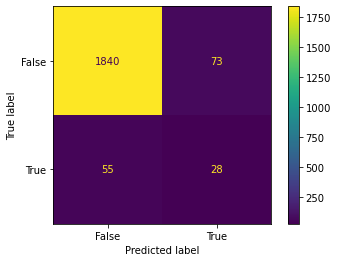

In [54]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

In this lesson, we didn't do any hyperparameter tuning, but it will be helpful in the next lesson to know what the depth of the tree `model_over`.

In [55]:
VimeoVideo("694057996", h="73882663cf", width=600)

**Task 5.2.18:** Determine the depth of the decision tree in `model_over`.

- [What's a decision tree?](../%40textbook/14-ml-classification.ipynb#Decision-Trees)
- [Access an object in a pipeline in scikit-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Accessing-an-Object-in-a-Pipeline)

In [57]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

33


# Communicate

Now that we have a reasonable model, let's graph the importance of each feature.

In [58]:
VimeoVideo("694057962", h="f60aa3b614", width=600)

**Task 5.2.19:** Create a horizontal bar chart with the 15 most important features for `model_over`. Be sure to label your x-axis `"Gini Importance"`.

- [What's a <span id='term'>bar chart</span>?](../%40textbook/07-visualization-pandas.ipynb#Bar-Charts)
- [<span id='technique'>Access an object in a pipeline in <span id='tool'>scikit-learn</span></span>.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Accessing-an-Object-in-a-Pipeline)
- [<span id='technique'>Create a bar chart using <span id='tool'>pandas</span></span>.](../%40textbook/07-visualization-pandas.ipynb#Bar-Charts)
- [<span id='technique'>Create a Series in <span id='tool'>pandas</span></span>.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns)

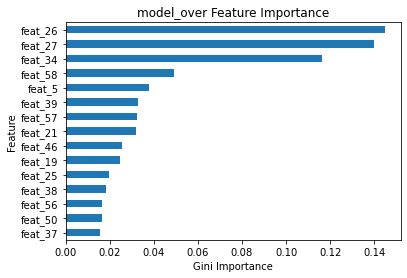

In [60]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

There's our old friend `"feat_27"` near the top, along with features 34 and 26. It's time to share our findings.

Sometimes communication means sharing a visualization. Other times, it means sharing the actual model you've made so that colleagues can use it on new data or deploy your model into production. First step towards production: saving your model.

In [61]:
VimeoVideo("694057923", h="85a50bb588", width=600)

**Task 5.2.20:** Using a context manager, save your best-performing model to a a file named `"model-5-2.pkl"`. 

- [What's serialization?](../%40textbook/03-pandas-getting-started.ipynb#Pickle-Files)
- [Store a Python object as a serialized file using pickle.](../%40textbook/03-pandas-getting-started.ipynb#Pickle-Files) 

In [62]:
# Save your model as `"model-5-2.pkl"`
with open("model-5-2.pkl","wb") as f:
    pickle.dump(model_over,f)

In [63]:
VimeoVideo("694057859", h="fecd8f9e54", width=600)

**Task 5.2.21:** Make sure you've saved your model correctly by loading `"model-5-2.pkl"` and assigning to the variable `loaded_model`. Once you're satisfied with the result, run the last cell to submit your model to the grader. 

- [Load a Python object from a serialized file using pickle.](../%40textbook/03-pandas-getting-started.ipynb#Pickle-Files)

In [64]:
# Load `"model-5-2.pkl"`
with open("model-5-2.pkl","rb") as f:
    loaded_model = pickle.load(f)  
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


In [65]:
with open("model-5-2.pkl", "rb") as f:
    loaded_model = pickle.load(f)
    wqet_grader.grade(
        "Project 5 Assessment",
        "Task 5.2.16",
        loaded_model,
    )

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
